In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
opSimVisits = pd.read_csv('/Users/rbiswas/doc/projects/LSST/Twinkles/code/SN_sims/SelectedKrakenVisits.csv',
                          index_col='obsHistID')

In [3]:
opSimVisits.head()

,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,obsID
obsHistID,,,,,,,,,,,,,,,,,,,,,
220,1042,152,1427,0.925184,-0.4789,g,11699,59580.135415,0,34,...,84.048697,0.869226,0,0,0.000000,120,24.357859,0.907976,-0.505351,220
230,1042,152,1427,0.925184,-0.4789,i,12177,59580.140948,0,34,...,84.905894,0.791241,0,0,0.000000,120,23.529519,0.907976,-0.505351,230
200,1042,152,1427,0.925184,-0.4789,r,10861,59580.125716,0,34,...,82.698160,0.744120,0,0,0.837387,140,24.234817,0.907976,-0.505351,200
276,1042,152,1427,0.925184,-0.4789,y,14069,59580.162846,0,34,...,89.102576,1.132846,0,0,0.000000,120,21.187902,0.907976,-0.505351,276
250,1042,152,1427,0.925184,-0.4789,z,13015,59580.150647,0,34,...,86.600272,0.928894,0,0,0.000000,120,22.841986,0.907976,-0.505351,250


In [36]:
surveyStartDate = 59580

In [4]:
krakenObs = pd.read_csv('krakenvists_twinkles.csv', index_col='obsHistID')

In [5]:
krakenObs.head()

,Unnamed: 0,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,mag_6000184645801,mag_6000184408901,mag_6000043638100,mag_6001586473901,mag_6000269054205,mag_6001531895002,mag_6000321245000,mag_6001417557202,mag_6000637885901,mag_6000221385203
obsHistID,,,,,,,,,,,,,,,,,,,,,
220,0,1042,152,1427,0.925184,-0.4789,g,11699,59580.135415,0,...,28.266336,27.866121,27.697391,28.145976,28.526304,28.404733,28.418325,28.005642,28.323475,27.438158
230,1,1042,152,1427,0.925184,-0.4789,i,12177,59580.140948,0,...,27.617377,27.784248,27.275260,27.878113,27.823338,28.086856,27.926815,27.864636,27.884126,27.228839
200,2,1042,152,1427,0.925184,-0.4789,r,10861,59580.125716,0,...,27.536583,27.479861,27.140664,27.601803,27.763960,27.868612,27.766292,27.558418,27.694935,27.015630
276,3,1042,152,1427,0.925184,-0.4789,y,14069,59580.162846,0,...,27.297952,27.498321,27.244944,27.282763,27.503450,27.734839,27.486826,27.409329,27.393466,27.239481
250,4,1042,152,1427,0.925184,-0.4789,z,13015,59580.150647,0,...,27.639220,27.791272,27.483809,27.668637,27.848579,28.062127,27.850256,27.750957,27.766323,27.452931


In [7]:
krakenObs['fsD'] = opSimVisits['fiveSigmaDepth']

In [9]:
sncols = [x for x in krakenObs.columns if x.startswith('mag_')]
HSNR_sn = [x for x in sncols if (krakenObs[x] - krakenObs['fsD']).min() < 0.]

In [10]:
print len(HSNR_sn), len(sncols)

1077 13883


In [19]:
HsnrID = [int(x.split('_')[1]) for x in HSNR_sn]

In [12]:
twinklesSN = pd.read_csv('kraken_sim.csv', index_col='snid')

In [17]:
twinklesSN.index

Int64Index([6001014685800, 6000001337700, 6000067275900, 6001014687900,
            6000635785100, 6000003901100, 6000223131300, 6001014685801,
            6000222594300, 6001014700100,
            ...
            6000639100002, 6000184833700, 6000124769101, 6000453898403,
            6000637885901, 6001355552000, 6000639693502, 6000879935200,
            6001171318102, 6000221385203],
           dtype='int64', name=u'snid', length=307900)

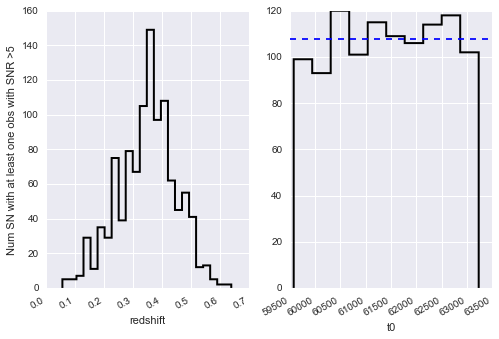

In [63]:
fig, ax = plt.subplots(1, 2)
sns.distplot(twinklesSN.ix[HsnrID, 'redshift'], rug=False, kde=False,
             hist_kws={'histtype':'step', 'alpha':1, 'color':'k', 'lw':2}, ax=ax[0])
ax[0].set_ylabel('Num SN with at least one obs with SNR >5')
t0hist = sns.distplot(twinklesSN.ix[HsnrID, 't0'] + surveyStartDate, rug=False, kde=False, bins=10,
             hist_kws={'histtype':'step', 'alpha':1, 'color':'k', 'lw':2}, ax=ax[1])
t0hist.axhline(np.mean(np.histogram(twinklesSN.ix[HsnrID, 't0'] + surveyStartDate, bins=10)[0]), linestyle='dashed')
t0hist.figure.autofmt_xdate()

In [60]:
np.histogram(twinklesSN.ix[HsnrID, 't0'] + surveyStartDate, bins=20)

(array([45, 54, 50, 43, 66, 54, 47, 54, 54, 61, 50, 59, 55, 51, 58, 56, 55,
        63, 62, 40]),
 array([ 59581.57312345,  59763.92047063,  59946.26781782,  60128.61516501,
         60310.96251219,  60493.30985938,  60675.65720657,  60858.00455375,
         61040.35190094,  61222.69924813,  61405.04659531,  61587.3939425 ,
         61769.74128969,  61952.08863687,  62134.43598406,  62316.78333125,
         62499.13067843,  62681.47802562,  62863.82537281,  63046.17271999,
         63228.52006718]))

In [48]:
t0hist.set_xticklabels(t0hist.get_xticklabels())

In [18]:
HsnrID

['6000068561600',
 '6000000563900',
 '6000000563901',
 '6000456681900',
 '6000018388500',
 '6001298854000',
 '6000011371600',
 '6000029190500',
 '6000011373800',
 '6000011373801',
 '6000005864600',
 '6000732728000',
 '6000439026600',
 '6000730813700',
 '6000257604700',
 '6000519497500',
 '6000314620700',
 '6000257604701',
 '6000733329900',
 '6000858772300',
 '6000147691900',
 '6000025898000',
 '6001523857800',
 '6000858772301',
 '6000213229800',
 '6000981572900',
 '6001524169900',
 '6000061069800',
 '6001405450100',
 '6000858772302',
 '6000097004000',
 '6000148256000',
 '6000437860000',
 '6000314500100',
 '6000308301900',
 '6001467210700',
 '6000856710500',
 '6000080362600',
 '6000313019100',
 '6000609491400',
 '6000312501700',
 '6001283526000',
 '6000039586000',
 '6001578309100',
 '6000061367700',
 '6000620432200',
 '6000178743000',
 '6000216240200',
 '6000147342600',
 '6000612972400',
 '6000443541000',
 '6001465162900',
 '6000098484000',
 '6001136549600',
 '6000312439100',
 '60015782